In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

tips = sns.load_dataset('tips')

# Bias and Variance

Outline

* How to evaluate the quality of a model?
* Intro: Bias and Variance
* Training-Test Split
* Cross Validation

## Evaluating the fit model



<img src="imgs/image_0.png" width="100%">

## Evaluating the quality of a model

* Given a fit regressor on dataset, calculate e.g. the root-mean-square error.
* If the error is low, do you think it's a good model?
    - It fits the given *data* well, but is it a good model? (Is the sample representative?)
    - Will it give good predictions on similar, unknown, data?

## Fundamental Concepts of the quality of a 'fit model'

* **Bias**: the expected deviation between the predicted value and true value (our predictions are close in average)
* **Variance**: 
    - **Observation Variance**: the variability of the random noise in the process we are trying to model 
    (variance in the dataset!). 
    (how much each individual point varies from its true value)
    - **Estimated Model Variance**: the variability in the predicted value across different datasets. 
    
    (Does the model generalize?)

## Example

- Suppose the estimator is a bathroom scale. Suppose you  weigh yourself on a really good scale and find you are 150 pounds.

- Now, if you get on and off a bathroom scale 10 times, then the bias is how far the average is from 150. The variance is a measure of how spread out the values are.  

For example:

* Zero bias, high variance:   140, 160, 145, 155, 160, 165, 140, 135, 138, 162
* Pos bias, high variance:    142, 161, 149, 156, 160, 165, 145, 137, 139, 161.
* 0 bias, low variance:         148, 152, 151, 149, 151, 153, 149, 147, 149, 151
* Pos bias, low variance:      150, 153, 151, 148, 152, 152, 153, 151, 149, 150

from here: https://www.quora.com/What-is-the-difference-between-the-bias-and-variance-of-an-estimator

### Model Quality: Bias and Variance

<div class="image-txt-container">
    
* The red bulls-eye: the true behavior of DGP
* Each dart: a specific function that models/predicts the DGP
* The model parameters $\theta$ select these functions.
* Credit: Scott Fortmann-Roe
    
<img src="imgs/image_1.png" width="50%">

</div>


## Evaluating the quality of a linear model

Given a dataset on which to fit the regression coefficients:
1. Calculate the RMSE to test for bias (is this line in a right direction? Do we have reasonable predictions on average?)
2. To test for variance, bootstrap estimate the regression coefficients:
    - Sample the data.
    - For each sample, calculate the linear predictor.
    - For each input feature, calculate the CI for the distribution of predictions.
    - Large "prediction intervals" imply the model is susceptible to noise (e.g. outliers)
    
Still, this relies on a "representative sample" for generalization to new data!

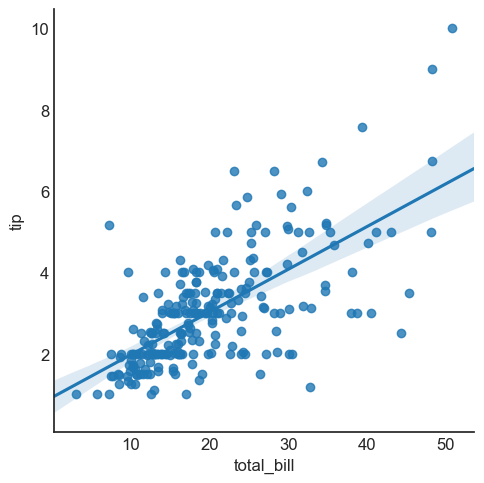

In [3]:
# observation variance
sns.lmplot(data=tips, x='total_bill', y='tip');

## Evaluating the quality of a (general) model

* Given a fit (non-linear) model, there are three possibilities for quality:
    - The model doesn't fit the given data well (high bias; underfit)
    (non-linear curve and linear model)
    - Does it reflect the process of interest? (good fit; robust)
    - Does it only fit the data (noise and all)? (high variance; overfit)
    (fitting to the noise as well)

* How can we ascertain the quality on similar, out-of-sample data?

## Evaluating the quality of a (general) model

* Given a quadratic process, a linear model has high bias.
* "Connecting-the-dots" will fail to generalize (high variance).
* Balance model complexity with complexity of DGP.

![overfit](imgs/under-over-fit.png)


# Decision trees

Fun example: 

### Example: predicting survival on the Titanic with Decision Trees

<div class="image-txt-container">

* Did a given passenger survive the Titanic disaster?
* The (simple) tree below has mediocre accuracy (high bias).

<img src="imgs/tree.png" width="50%">

</div>

### Reducing Bias with more complicated models

* Improve performance by "growing" the decision tree model.
* Decrease the number of passengers required in leaf nodes.
* Effect: "Learn" individual passengers?
* How do the know your model generalizes?

<img src="imgs/Titanic_Decision_Tree.png" width="100%">


## Train-Test Split

To assess your model for overfitting to the data, randomly split the data into a "training set" and a "test set".

<div class="image-txt-container">

* The training set is used to fit the model (train the predictor).
* The test set is used to test the goodness-of-fit of the fit model.
* *similar* to bootstrap estimating a regression model.

<img src="imgs/train_test.jpg">

</div>



## The machine learning training pipeline:

<img src="imgs/train-test.png" width="50%">

Scikit-Learn has functions that help us do this.

### Using Scikit-Learn for train-test split

* Splitting a dataset using `sklearn.model_selection.train_test_split` 
* Given features `X` and a target array `y`,
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
```
randomly splits the features and target into training and test sets.

In [4]:
from sklearn.model_selection import train_test_split

X = tips.drop('tip', axis=1)
y = tips.tip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [5]:
print(
    len(X_train)/len(X),
    len(X_test)/len(X)
)

0.75 0.25


### Example Prediction Pipeline

* Train a simple linear regression model on the tips data
* Split the data into a training and test set:
    - fit the model on the training set
    - compute the error on the test set

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

X = tips.drop(['tip', 'sex', 'smoker', 'day', 'time' ], axis=1)
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


pl = Pipeline([
   ('lin-reg', LinearRegression())
])



pl.fit(X_train, y_train)
preds = pl.predict(X_test)
rmse = np.sqrt(np.mean((preds - y_test)**2))
print ("RMSE: %s" % rmse)

RMSE: 1.1789127992516917


## Model building involves choices

* How much feature complexity?
* What model type? Which model parameters?
* How do we make these choices?

<img src="imgs/image_0.png">

## Generic features increase model expressivity

* Consider periodic sales data example
* Linear combinations of radial basis functions can fit *any* curve.
    - How do you know how many? Which ones?

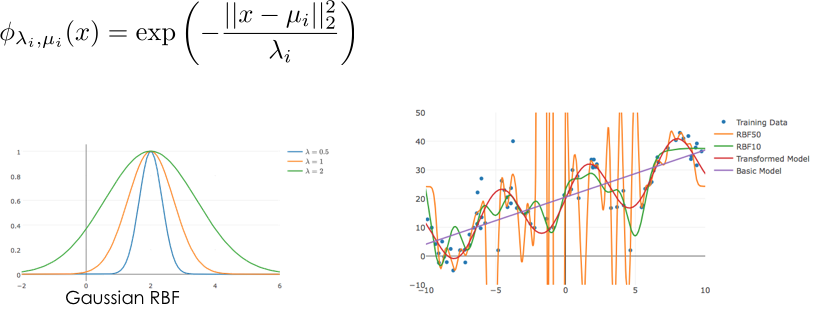

## Sales data: training error
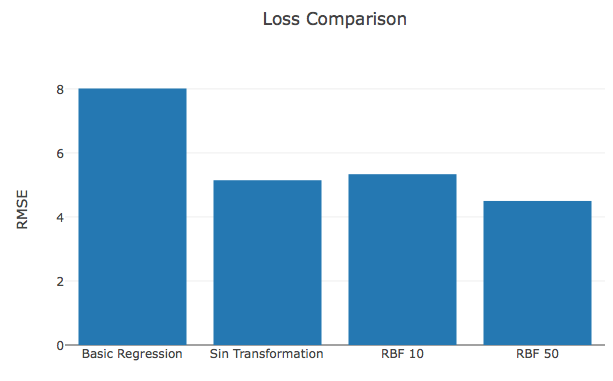

## Sales data: training vs test error
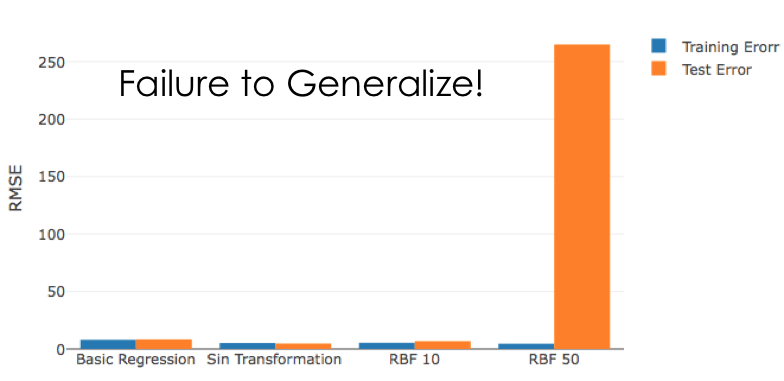

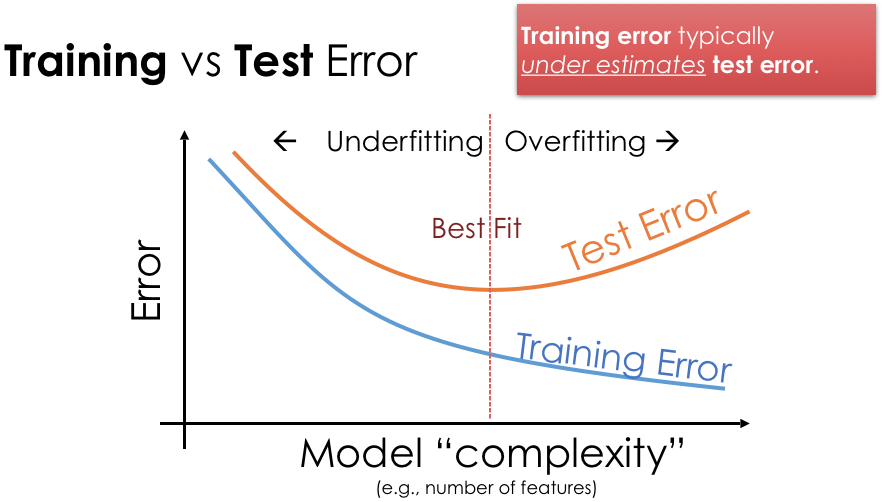

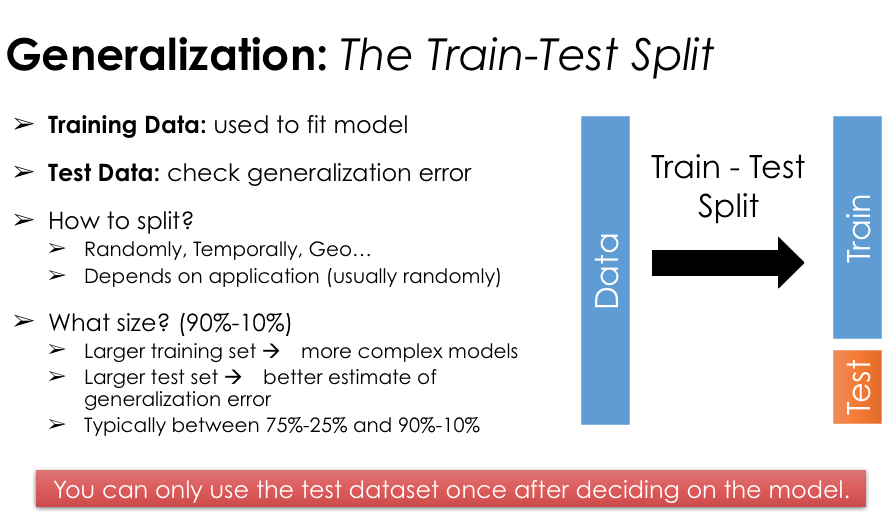

### Question: training-test splits with time-series

* Suppose you want to predict stock market performance
* Dataset: 2017 stock data
* Does a simple 'train-test-split' work? Why or why not?
* How would you train-test-split this data?

## Train-Test Assessment

Hand-tuning parameters for a model:
* Fit model attempt #1 with train; check error on test (ok).
* Fit model attempt #2 with train; check error on test (better).
* Fit model attempt #3 with train; check error on test (best).

Did our parameter select just over-fit to the test set? Need another split for **validation**!


<img src="imgs/holdout.jpg" width="100%">

### Hold-out strategy

* Leaves the test set independent of the model training.
* Computationally similar to using only train-test.
* High variance in model selection, as the validation set:
    - is chosen only once, outliers
    - may be small

<img src="imgs/kfold.jpg" width="75%">

## k-fold cross-validation

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores


## Cross-validation strategy

* Less variation: it uses the entire training set; fits model multiple times.
* Higher computational costs: a model is trained K times at the validation step.

## Cross-validation in Scikit-Learn

* Cross-validation "by-hand" using `KFold`:
```
KFold(numfolds, shuffle, random_state)
```

In [9]:
# scikit-learn k-fold cross-validation

from sklearn.model_selection import KFold
# data sample
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# prepare cross validation
kfold = KFold(3, True, 1)

# enumerate splits
for train, test in kfold.split(data):
    print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


## Cross-validation in Scikit-Learn

* Cross-validation for sklearn model pipelines in `sklearn.model_selection`:
```
cross_val_score(estimator, data, target, cv)
```
* `cv` parameter (e.g. number of folds) for splitting the data.
* Runs the model builds in parallel on multiple cores.

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [22]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
X = tips[['total_bill', 'size']]
y = tips.tip

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([('lr', LinearRegression())])

In [17]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores  # R^2

array([0.73767073, 0.49725672, 0.12533361, 0.15444151, 0.35847093])

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [19]:
pipeline.score(X_test, y_test)

0.22514425092065415

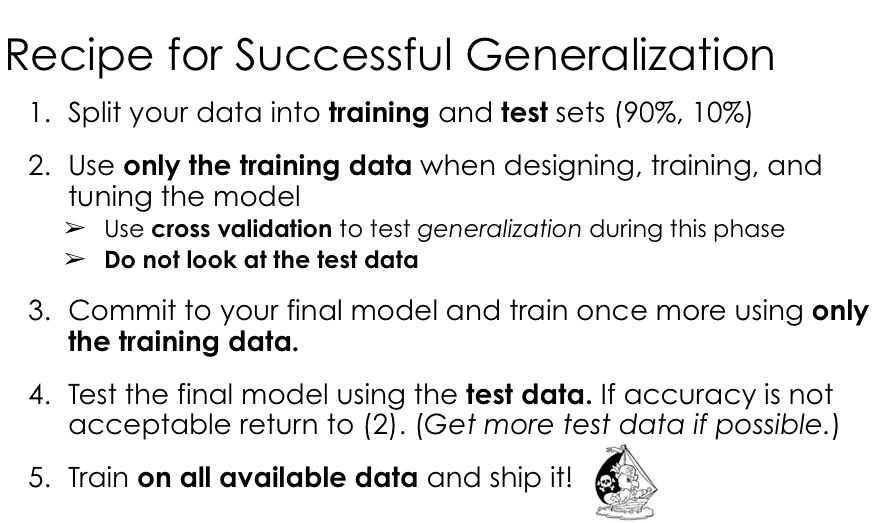

## Example: decision trees for prediction

* Easy to interpret (for small trees); like a flow chart.
* Don't require much feature engineering or scaling.
* Non-parametric; capture non-linear behavior
* We will learn how they behave; learn a little about their internals.

### Examples of when it's good/bad to play tennis

<div class="image-txt-container">
    
* Create a tree that:
    - takes in the current days conditions
    - predicts if the day will be a good day for tennis.


<img src="imgs/tennis.png" width="50%">

</div>

### Example decision tree

<div class="image-txt-container">

* Start with a "root" attribute.
* Split each attribute to maximize separation of target.
* [A tutorial on creating trees](https://medium.com/machine-learning-guy/an-introduction-to-decision-tree-learning-id3-algorithm-54c74eb2ad55)

<img src="imgs/tennis-tree.png" width="50%">

</div>

### Trees are split to maximize the purity of the leaf nodes

* A "perfect" tree is one which has perfectly separated the classes.
* Separation is measured statistically (e.g. "cross-entropy" or "gini")
<img src="imgs/tree-impurity.png" width="75%">

### Example decision tree

<div class="image-txt-container">

* A few **Parameters:**
* Tree-depth
* minimum observation for a leaf  (say, fewer than 50 observations no more splitting)
* splitting criterion (entropy, gini)

<img src="imgs/tennis-tree.png" width="50%">

</div>

### A smaller decision tree

<div class="image-txt-container">

* Restricting the tree-depth parameter to 1:
* Creates a simpler tree
* Creates a biased estimate

<img src="imgs/small-tree.png" width="20%">

</div>

### Example: Predicting Diabetes

* Given health measurements, can you predict whether an individual will develop diabetes?
* Classification of health outcomes: 0=NO DIABETES and 1=DIABETES
* We will use 'accuracy' to evaluate the model (not necessarily the best choice!)

In [ ]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

In [ ]:
diabetes[['Pregnancies','Insulin', 'BMI', 'Glucose', 'Outcome']].describe()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# features
X = diabetes.drop('Outcome', axis=1)
# outcome
y = diabetes.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
# look at the importance of each feature in our tree model
dict(zip(X.columns, clf.feature_importances_))

In [ ]:
# maximum depth
clf.tree_.max_depth

In [ ]:
# node count
clf.tree_.node_count

In [ ]:
clf_small = DecisionTreeClassifier(max_depth=2)
clf_small.fit(X_train, y_train)
clf_small.score(X_train, y_train)

In [ ]:
clf_small.score(X_test, y_test)

In [ ]:
from util import tree_to_code

In [ ]:
tree_to_code(clf_small, X.columns)

In [ ]:
tree_to_code(clf, X.columns)

## How to select model parameters?

* Each combination of model parameters requires: 
    - fitting a model; evaluating the model; comparing performance.
* This leads to training perhaps *thousands* of models!
    - How to do this in a computationally feasible way?
    - How to keep your code clean to keep track?

## How to select model parameters?

* How to select in a computationally feasible way?
    - Trying every combination ('grid search') works for smaller data/models.
    - Sampling possible combinations of parameters using probabilistic reasoning.
    
* How to keep your code clean to keep track?
    - The `sklearn.model_selection` package.

### Example: parameter search for diabetes prediction

* Decision tree has possible parameters:
    - `max_depth`, `min_samples_split`, `min_samples_leaf`
    - plus others we won't consider
    
* We will use `GridSearchCV` to explore parameter combinations using cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# How many combinations are there to search through?

parameters = {
    'max_depth': [2,3,4,5,7,10,13,15,18,None], 
    'min_samples_split':[2,3,5,7,10,15,20],
    'min_samples_leaf':[2,3,5,7,10,15,20]
}

In [ ]:
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
# number of models fit
len(clf.cv_results_['mean_test_score'])

### Was the "best parameter" the only "best choice"

* Plot the histogram of scores across all models
* Many high values implies many good model choices
    - Robust model
* Plot the histogram of standard deviations for the CVs
    - many small numbers imply most parameters give stable models.

In [ ]:
# Each x-value is the score of a different model,
# corresponding to a choice of parameters
#
plt.hist(clf.cv_results_['mean_test_score'])
plt.suptitle('accuracies on validation set for CV');

In [ ]:
# Each x-value is the standard deviation for the 5-fold CV for a single model
# corresponding to a choice of parameters
plt.hist(clf.cv_results_['std_test_score'])
plt.suptitle('std deviation of CV scores');

In [ ]:
clf_best = clf.best_estimator_

In [ ]:
clf.score(X_test, y_test)

In [ ]:
tree_to_code(clf_best, X.columns)